# A Monte Carlo simualtion... to help me win at darts. 

I was playing darts with my friend Jakob the other day. Like most people, i think, I kept aiming for the triple 20, trying to get as many points as possible. 

However, I noticed that when I missed - which was very often - I would frequently score only a 1 or a 5. (The two scores that surround 20). Looking around the board I noticed that the 19 is surrounded by a 3 and a 7. Would it be better to aim for a triple 19?  

<img src="dartboard.jpg" alt="Drawing" style="width: 400px;"/>

Clearly for pro-players the best tactic is to aim for a triple 20. What is the best tactic for the rest of us? In this notebook I will use a Monte Carlo simulation to find out!



## Monte Carlo simulation?:

These simulations *"rely on repeated random sampling to obtain numerical results"*. (Thanks Wikipedia.) In this case it means we will simulate a player who aims darts at a point on the dartboard but actually hits the dartboard at a random distance from this point. By averaging the scores they get for each throw we can get an expected score for each point on the dartboard. The point with the largest expected score is the optimum target. 

(Note: In this notebook the raw code is hidden and the custom functions for simulating darts throws and scores are found in darts.py)


In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
#  Dependencies
import darts
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from ipywidgets import Output

## Taking aim

For our simulation we assume that when a player aims at a point on the dartboard the dart lands within a *normal distribution* around that point, where the skill of the player defines the width of the distribution. If the last sentence doesn't make sense to you then just take a look at these plots:

100 throws from a novice, intermediate and expert player (all aiming at the bullseye)

Output()

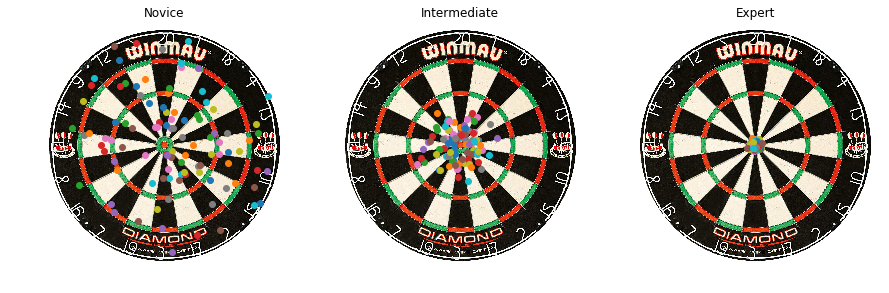

In [3]:
skill_dict = {'Novice': 100, 'Intermediate': 30, 'Expert': 5}

N_throws = 100
N_players = len(skill_dict)
scores = np.zeros((N_players, N_throws))

img = plt.imread("dartboard.jpg")
pic_rad = 241

fig, ax = plt.subplots(1, N_players, figsize = (15,15))

# Wait message
out = Output()
display(out)
with out:
    print('Simulating throws...')

m = 0
for player_level, sigma in skill_dict.items():
    ax[m].imshow(img, extent=[-pic_rad, pic_rad, -pic_rad, pic_rad])
    ax[m].set(xlim=(-pic_rad, pic_rad), ylim=(-pic_rad, pic_rad))
    ax[m].title.set_text(player_level)
    ax[m].axis('off')
    for n in range(N_throws):
        dart_pos = darts.throw(np.array([0,0]), sigma)
        ax[m].scatter(*dart_pos)
        
        # save scores for next section
        scores[m, n] = darts.score(dart_pos)
    m += 1

# Removes wait message
out.clear_output()

## Keeping score

Next we need to work out the average score each player gets when aiming at a particular point on the board. The average score is the total score divided by the number of throws. 

For instance, in the examples shown above the average scores are:

In [4]:
print('Novice: ', np.mean(scores[0,:]))
print('Intermediate: ', np.mean(scores[1,:]))
print('Expert: ', np.mean(scores[2,:]))

Novice:  8.71
Intermediate:  11.04
Expert:  40.58


## Searching for the ideal target

Now we just need to try aiming at lots of different points on the dartboard and calculate the average score for each position. The maximum average score will tell us our ideal target!

In [5]:
## Scanning the dartboard
x_range = np.arange(-180, 180, 5)
y_range = np.arange(-180, 180, 5)
av_score = np.zeros((N_players, len(x_range), len(y_range)))
max_point = np.zeros((N_players, 2))

N_throws = 200

# Wait message
out = Output()
display(out)
with out:
    print('Calculating average scores...')

n_player = 0
for player_level, sigma in skill_dict.items():
    for xi, x in enumerate(x_range):
        for yi, y in enumerate(y_range):
            av_score[n_player, xi, yi] =darts.expected_score(np.array([x,y]), sigma, N_throws)
            
    # maximum avergae score
    max_point[n_player, :] = np.unravel_index(av_score[n_player, :, :].argmax(), av_score[n_player, :, :].shape)
    
    n_player += 1
    
    
    
# Remove wait message
out.clear_output()

Output()

Output()

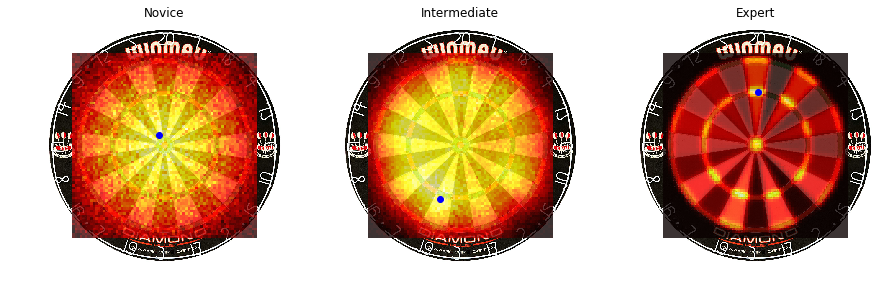

In [6]:
# Wait message
out = Output()
display(out)
with out:
    print('Plotting...')


## Plotting
fig, ax = plt.subplots(1, N_players, figsize = (15,15))

m = 0
for player_level, sigma in skill_dict.items():
    ax[m].imshow(img, extent=[-pic_rad, pic_rad, -pic_rad, pic_rad])
    ax[m].set(xlim=(-pic_rad, pic_rad), ylim=(-pic_rad, pic_rad))
    ax[m].title.set_text(player_level)
    ax[m].axis('off')
    
    heat_map = np.rot90(av_score[m,:,:])
    nu = 0.75 # to make heatmap line up with 
    ax[m].imshow(heat_map, cmap='hot', interpolation='nearest', extent=[-pic_rad*nu, pic_rad*nu, -pic_rad*nu, pic_rad*nu], alpha = 0.8)
    
    # plot max point
    ax[m].scatter(x_range[int(max_point[m, 0])], y_range[int(max_point[m, 1])], color = 'b')
    
    m += 1


# Remove wait message
out.clear_output()

Here the brighter white regions indicate a higher expected score. The blue dot indicates the maximum expected score. 

As predicted at the start the best tactic for experts is to aim at the triple 20. For intermediate level players aiming at the triple 19 is the optimum strategy and will return more points on average. Novice players should simply aim at the center of the board.

Now where is Jakob for a rematch?...

## One hundred and eighty!!!

I should now mention (I should probably have mentioned this before) that of course other people have analysed this problem too... and in a lot more depth! If you're interested in more detail check out these studies: 
http://datagenetics.com/blog/january12012/index.html 
https://www.stat.cmu.edu/~ryantibs/papers/darts.pdf